 # Titanic(Classical Problem) For Machine Learning Engineers

In [1]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os


sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')


df_train=pd.read_csv('/home/rahul/Desktop/Link to rahul_environment/Kernels/Titanic_Disaster/train.csv')
df_train.head()
test=pd.read_csv('/home/rahul/Desktop/Link to rahul_environment/Kernels/Titanic_Disaster/test.csv')
test.head()
type(df_train)
type(test)


pandas.core.frame.DataFrame

 # Scatter plot for the given dataset in the age and fare or you can say that

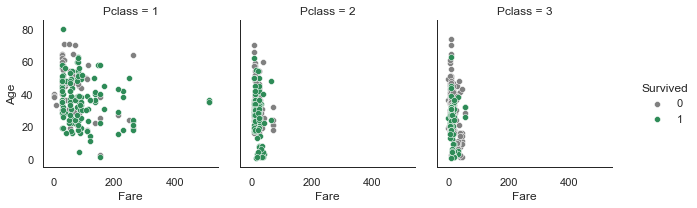

In [2]:
g=sns.FacetGrid(df_train,hue="Survived",col="Pclass",margin_titles=True,palette={1:"seagreen",0:"gray"})
g=g.map(plt.scatter,"Fare","Age",edgecolor="w").add_legend();

# # Box plot for graphically depicting groups of numerical data through their quartiles.

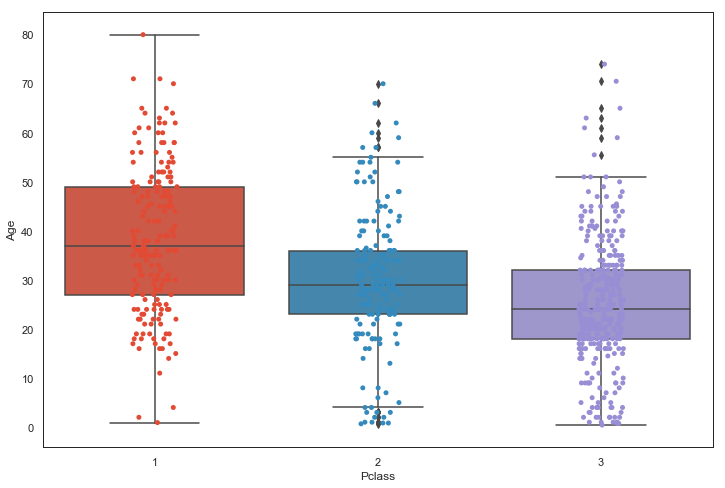

In [3]:
ax=sns.boxplot(x="Pclass",y="Age",data=df_train)
ax=sns.stripplot(x="Pclass",y="Age",data=df_train,jitter=True,edgecolor="grey")
plt.show()

 # Plotting all the subplots in the diagram

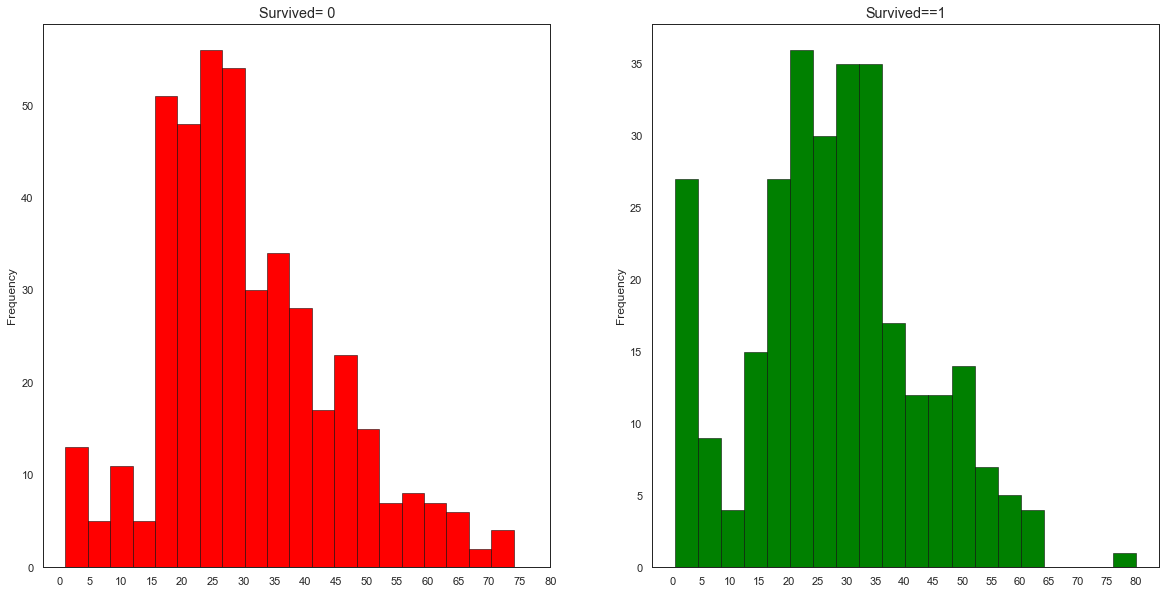

In [4]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title("Survived==1")
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()


#Now plotting the above predictions on the pie chart according to people who had survived or not in the situations

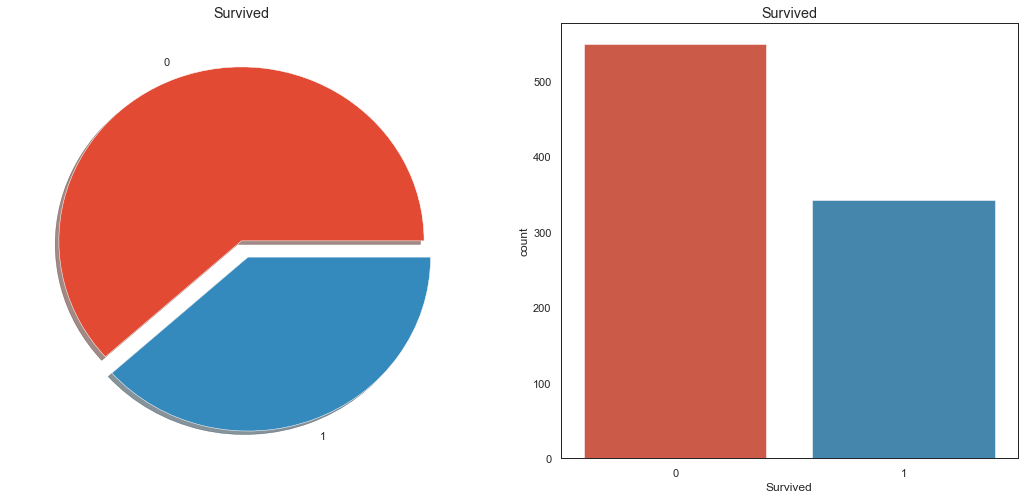

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()



  # finding the stats according to the sex of the person'

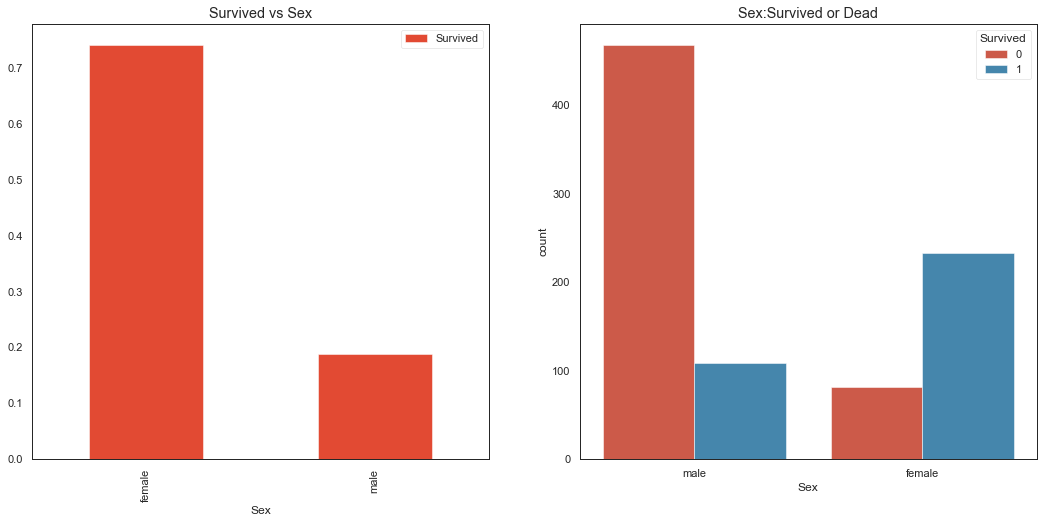

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived or Dead')
plt.show()


#making the multivariable plots
# we will be going to look at the scattterplots of all pairs of the attributes.

 # Plotting the scattter plots

<Figure size 864x576 with 0 Axes>

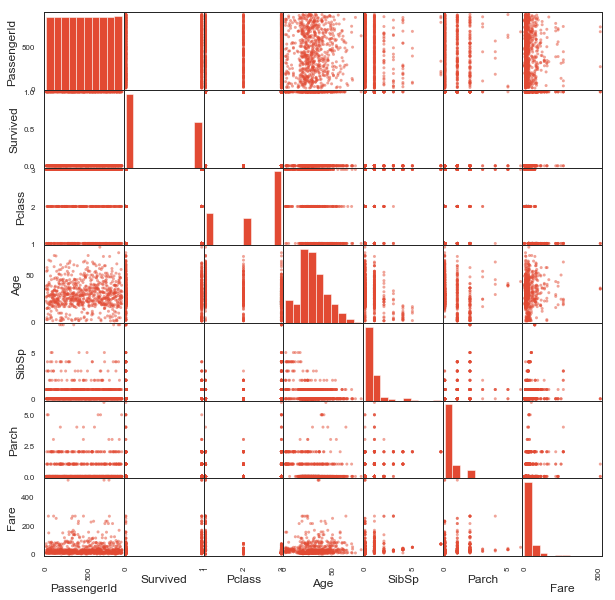

<Figure size 864x576 with 0 Axes>

In [7]:
pd.plotting.scatter_matrix(df_train,figsize=(10,10))
plt.figure()


 # Creating the violin plots of the given graph which can be used for creating of the plots

(<Figure size 1296x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f13feaa4d30>)

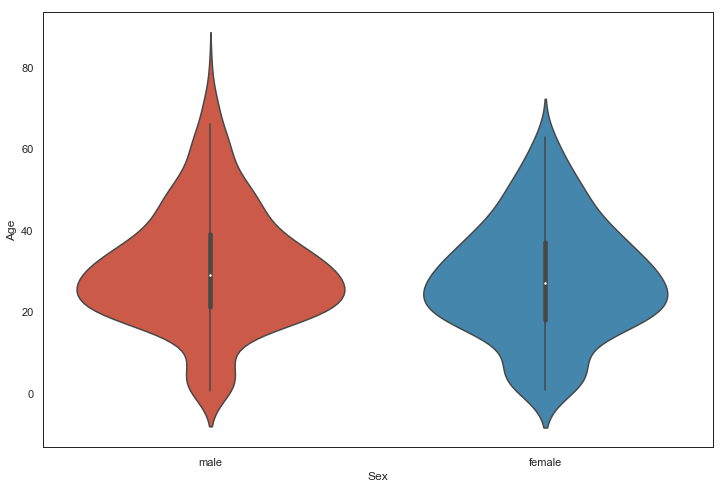

In [8]:
f,sns.violinplot(data=df_train,x="Sex",y="Age")


 # Making the violin plot  with Pclass and Age vs Survived

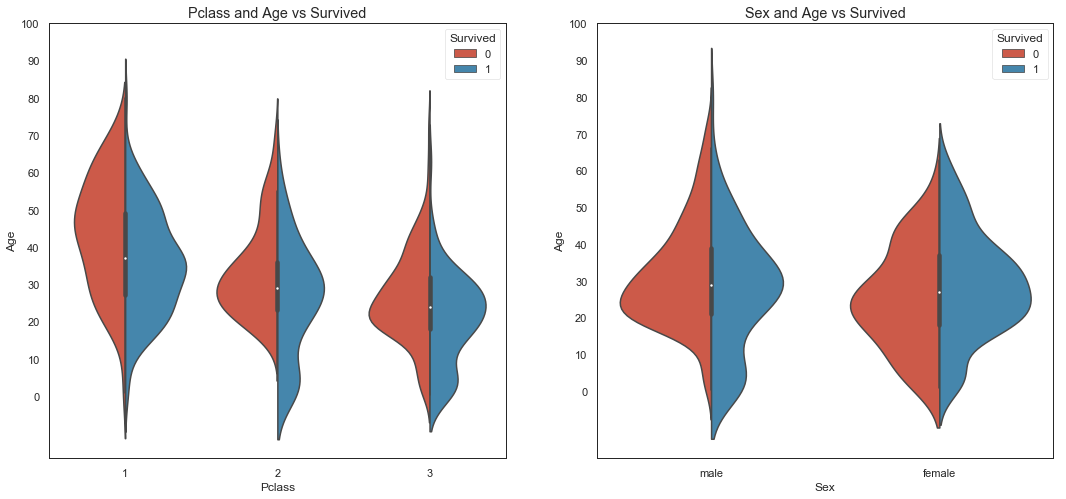

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=df_train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=df_train,split=True,ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()


 # Using the seaborn pairplot

In [10]:
sns.pairplot(df_train,hue='Sex')

ValueError: array must not contain infs or NaNs

using the kde plot for creating the histogram in the diagonal in the pairplot by kde

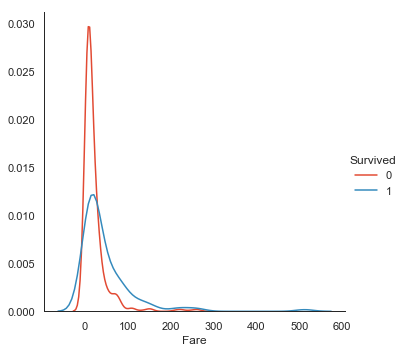

In [11]:
sns.FacetGrid(df_train,hue="Survived",size=5).map(sns.kdeplot,"Fare").add_legend()
plt.show()

 # Creating a joint plot between the fare and age column of the df_train which can help the find of the

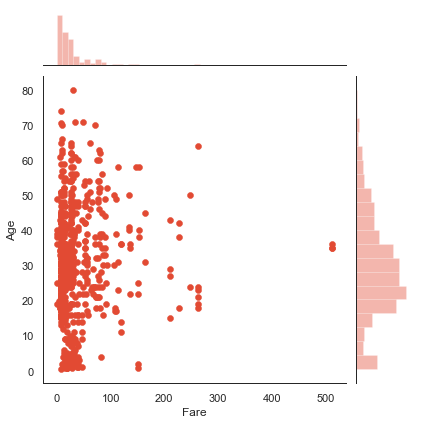

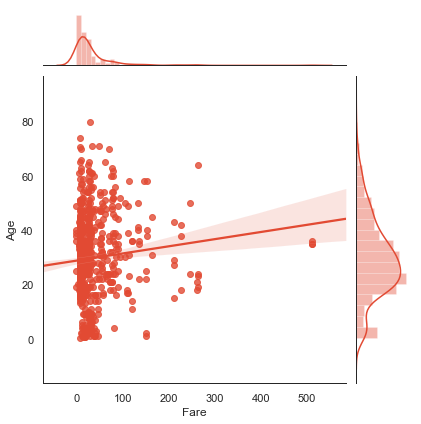

In [12]:
sns.jointplot(x='Fare',y='Age',data=df_train)

sns.jointplot(x='Fare',y='Age',data=df_train,kind='reg')


 # Creating a swarm plot for the age and pclass

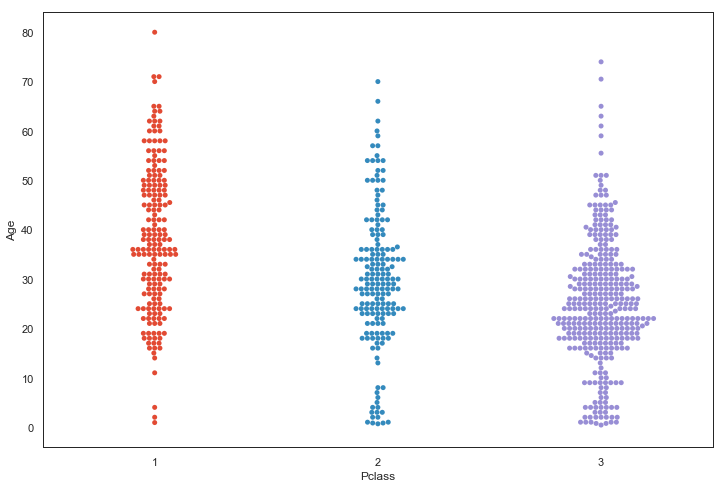

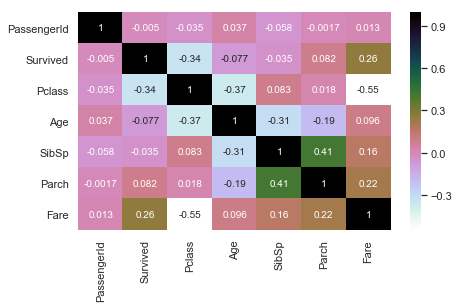

In [13]:
sns.swarmplot(x='Pclass',y='Age',data=df_train)

#creating a heatmap for the plot so that we can find out to use it
plt.figure(figsize=(7,4))
sns.heatmap(df_train.corr(),annot=True,cmap='cubehelix_r')
plt.show()



 # Creating a bar plot for the given point in the form of the graph

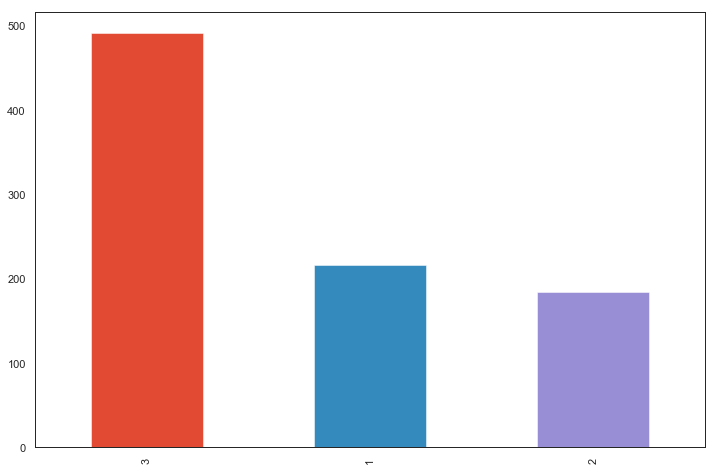

In [14]:
df_train['Pclass'].value_counts().plot(kind="bar")

#creating a factor plot for the for the plcass which includes the survived and sex of the persons

 # Going to create the factor plot

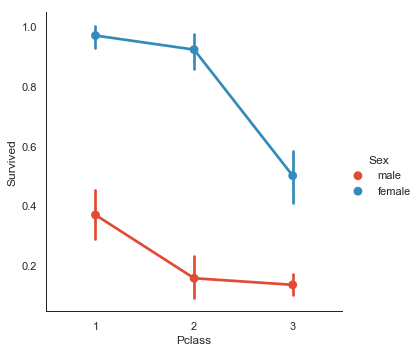

In [15]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)
plt.show()


 # Going to create the subplots which can be used for training the datasets.

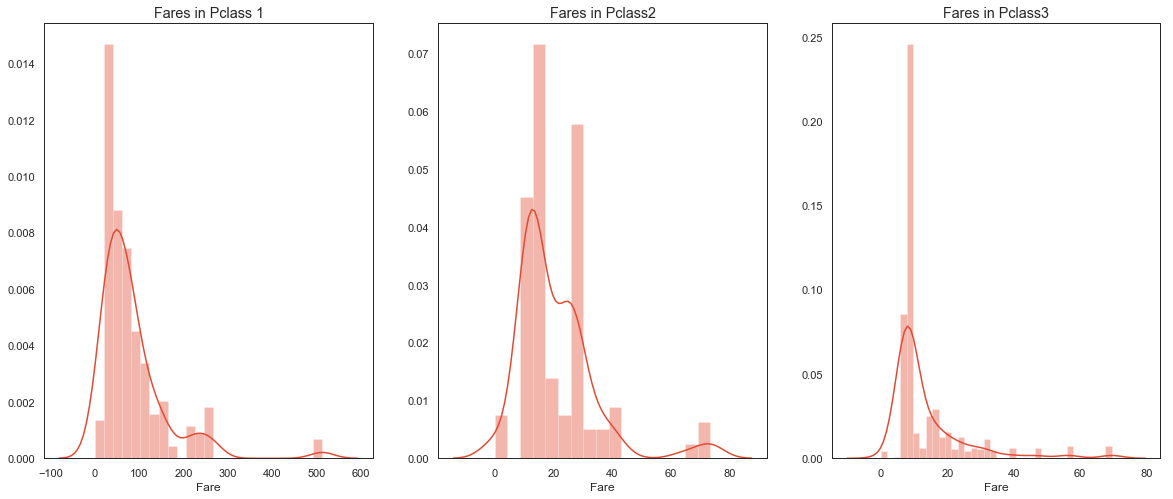

In [16]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df_train[df_train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(df_train[df_train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass2')
sns.distplot(df_train[df_train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass3')
plt.show()



## Now we will be going to proceed towards the data preprocessing 
#Some of the steps going to be done during the data processing are as follows:
# removing Target column (id)
# Sampling (without replacement)
    # Dealing with Imbalanced Data
    # Introducing missing values and treating them (replacing by average values)
    # Noise filtering
    # Data discretization
    # Normalization and standardization
    # PCA analysis
    # Feature selection (filter, embedded, wrapper)

#explorer dataset

In [17]:
print(df_train.shape)
print(df_train.size)

#how many na elements in every column is equal to

(891, 12)
10692


In [18]:
df_train.isnull().sum()

print(df_train.shape)

(891, 12)


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [20]:
df_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [21]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

for finding the first 5 data from the datasets

In [22]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


for finding the last 5 datas from the dateset

In [23]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


 # For popping the 5 elements randomly from the datasets

In [24]:
df_train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S


 # Very important
 # For getting the statistical summary of the datasets

In [25]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 # To check out the no of null values in the datasets you cann find out using isnull().sum()

In [26]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
df_train.groupby('Pclass').count()

# Getting the columns of the dataset for the index columns

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [28]:
df_train.columns

#getting the columns through the where clause

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
df_train.where(df_train['Age']==30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 # Performing some of the query on the dataset

In [30]:
df_train[df_train['Age']<7.2].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.700,G6,S


 # Separating the data into dependent and independent variables

In [31]:
X=df_train.iloc[:,:-1].values
y=df_train.iloc[:,-1].values
#Now we will be going to do the Data Cleaning

 # Data Cleaning
     When dealing with real-world data, dirty data is the norm rather than the exception.
     We continuously need to predict correct values, impute missing ones, and find links between various data artefacts such as schemas and records.
     We need to stop treating data cleaning as a piecemeal exercise (resolving different types of errors in isolation), and instead leverage all signals and resources (such as constraints, available statistics, and dictionaries) to accurately predict corrective actions.
     The primary goal of data cleaning is to detect and remove errors and anomalies to increase the value of data in analytics and decision making.[8]
 6-4-1 Transforming Features
 Data transformation is the process of converting data from one format or structure into another format or structure[wiki]
     Age
     Cabin
     Fare
     Name

 # Data Transformation

In [32]:
def simplify_age(df):
    df.Age=df.Age.fillna(-0.5)
    bins=(-1,0,5,12,18,25,35,60,120)
    group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
    categories=pd.cut(df.Age,bins,labels=group_names)
    df.Age=categories
    return df

def simplify_cabins(df):
    df.Cabin=df.Cabin.fillna('N')
    df.Cabin=df.Cabin.apply(lambda x:x[0])
    return df

def simplify_fares(df):
    df.Fare=df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names=['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories=pd.cut(df.Fare,bins,labels=group_names)
    df.Fare=categories
    return df
def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df=simplify_age(df)
    df=simplify_cabins(df)
    df=simplify_fares(df)
    df=format_name(df)
    df=drop_features(df)
    return df

df_train=transform_features(df_train)
test=transform_features(test)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


 # Feature Encoding
      In machine learning projects, one important part is feature engineering. It is very common to see categorical features in a dataset. However, our machine learning algorithm can only read numerical values. It is essential to encoding categorical features into numerical values[28]
     Encode labels with value between 0 and n_classes-1
     LabelEncoder can be used to normalize labels.
     It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [33]:
def encode_features(df_train,test):
    features=['Fare','Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined=pd.concat()